<a href="https://colab.research.google.com/github/MatDawit/AI4ALL/blob/yuwen-ver/StartupRandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/AI4ALL/Final_Project/modelingready_startupdata.csv")

**when training/testing data:**
- do label encoding on country
- freq encoding on category
<!-- - log transform funding_total_usd -->

**considerations for improving performance:**
- fix bias in data/imbalance - too many successful startups (oversampling)
- more trees, tune other random forest parameters -> understand the impact of each parameter
- remove some less relevant features (i have many dates) - feature engineering
  - only keep founding_year, remove all other dates for less noise
  - how much does noise/lots of features matter for random forest? is it the more features the better, or nah only keep correlated features - or is it ok bc random forest does the optimizing for u

future:
- testing with additional datasets -> more failed startups

## Random Forest Classification - predicting success (success/fail)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split

#split data - train/test
inputs = ['country_code', 'funding_rounds', 'dates_missing_originally', 'founding_year', 'founding_month', 'founding_day', 'first_funding_year', 'first_funding_month', 'first_funding_day', 'last_funding_year', 'last_funding_month', 'last_funding_day', 'funding_missing_originally', 'category_freq_avg']
x = data[inputs]
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#make random forest classifier model
rf_clasif = RandomForestClassifier()
rf_clasif.fit(X_train, y_train)
y_pred = rf_clasif.predict(X_test)

In [ ]:
y_pred

array([1, 0, 1, ..., 1, 1, 1])

Binary classification
- positive(1) - successful (ipo, acquired, operating)
- negative(0) - failed (closed)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("accurate predictions: ")
print(accuracy)
print("note: not good metric due to severely imbalanced classes - probably fails for predicting failed startups")
print("measures TP/(TP + FN)")

accurate predictions: 
0.8924229266174555
note: not good metric due to severely imbalanced classes - probably fails for predicting failed startups
measures TP/(TP + FN)


Confusion Matrix Analysis:
test sample (+dataset in general) = VERY imbalanced
- 1.6k failed startups vs. 16.8k successful startups
- failed startups were VERY commonly incorrectly predicted as successful
----
  - 7.17% () failed startups were correctly predicted as failed
  - ~90% failed startups were incorrectly predicted - as false positives
    - ~1500 false positives, ~500 false negatives
    - 3x more false positives -> model is very biased towards successful startups

**overall: high false positive rate = biased towards successful startups**

In [ ]:
# number of
y_test_df = pd.DataFrame(y_test) #y_test is originally a series - does not contain columns, only a 'status' label
y_test_df.groupby('status')['status'].count()
# alt: y_test_df.value_counts() -> counts number of values for each unique category

,status
status,
0,1604
1,16820


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
accuracy_by_class = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(accuracy_by_class)

Confusion Matrix:
[[  115  1489]
 [  493 16327]]


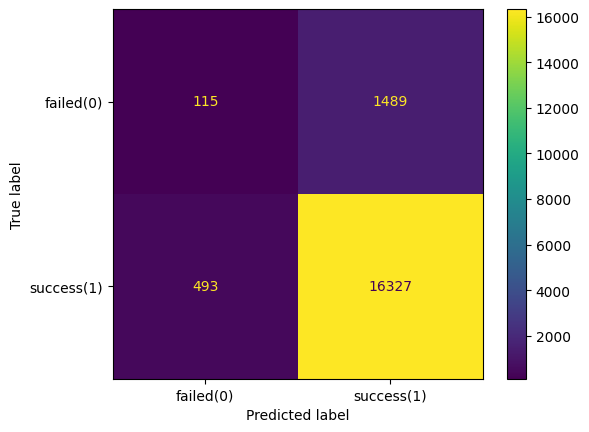

In [ ]:
cm_display = ConfusionMatrixDisplay(accuracy_by_class, display_labels=["failed(0)", "success(1)"])
cm_display.plot()

Classification Report Analysis
- all metrics are very low for 0 (failed startups) = low correct prediction rate

In [ ]:
from sklearn.metrics import classification_report
clasif_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(clasif_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.07      0.10      1604
           1       0.92      0.97      0.94     16820

    accuracy                           0.89     18424
   macro avg       0.55      0.52      0.52     18424
weighted avg       0.85      0.89      0.87     18424

